# Chapter 04 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Permutation Test

In [3]:
data = pd.read_csv("hospitalerrors_2.csv")
data.head()

,Row,Hospital,Treatment,Reduction
0,1,239,0,3
1,2,1126,0,1
2,3,1161,0,2
3,4,1293,1,2
4,5,1462,1,2


 Calculate difference of means for a permuation of the data

In [4]:
# set seed for reproducibility
random.seed(123)

data["shuffled"] = random.sample(list(data["Reduction"]), k=len(data))
randomized_means = data.groupby("Treatment")["shuffled"].mean()
difference = randomized_means[1] - randomized_means[0]
print(f"Difference after reshuffling {difference:.2f}")

Difference after reshuffling -0.28


 Repeat reshuffling 1000 times.

In [5]:
# set seed for reproducibility
random.seed(123)

# define a function for the resampling experiment
def resample_experiment(observation, treatment, repeats):
    differences = []
    observation = list(observation)
    for _ in range(repeats):
        # sample from the list without replacement to shuffle the data
        shuffled = pd.Series(random.sample(observation, k=len(observation)))
        randomized_means = shuffled.groupby(treatment).mean()
        difference = randomized_means[1] - randomized_means[0]
        differences.append(difference)
    return pd.Series(differences)

differences = resample_experiment(data["Reduction"], data["Treatment"], 1000)
print(f"Mean difference after reshuffling {np.mean(differences):.2f}")
print(f"Minimum difference {np.min(differences):.2f}")
print(f"Maximum difference {np.max(differences):.2f}")

# keep the result of the resampling experiment
resamples = {"repeat 1": differences}

Mean difference after reshuffling 0.01
Minimum difference -1.08
Maximum difference 1.08


 Plot the distribution of differences

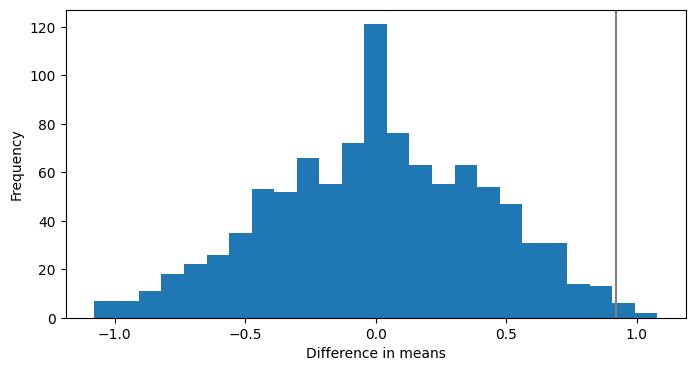

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences).plot.hist(bins=25, ax=ax)
ax.set_xlabel("Difference in means")
ax.set_ylabel("Frequency")
ax.axvline(x=0.92, color="grey")
plt.show()

 Calculate the probability of getting a difference of 0.92 or more

In [7]:
print("  ".join([f"{v:.2f}" for v in sorted(differences, reverse=True)[:25]]))
# we round here to compensate for small differences in floating point numbers
sum(differences.round(2) >= 0.92), sum(differences.round(2) >= 0.92) / len(differences)

1.08  1.00  0.92  0.92  0.92  0.92  0.92  0.92  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.76  0.76  0.76  0.76


(8, 0.008)

 Repeat permuation experiment with a different random seed

In [8]:
random.seed(456)
differences = resample_experiment(data["Reduction"], data["Treatment"], 1000)
resamples["repeat 2"] = differences
print("  ".join([f"{v:.2f}" for v in sorted(differences, reverse=True)[:25]]))
sum(differences.round(2) >= 0.92), sum(differences.round(2) >= 0.92) / len(differences)

1.08  1.08  1.08  1.00  1.00  1.00  1.00  1.00  0.92  0.92  0.92  0.92  0.92  0.92  0.92  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84


(15, 0.015)

 Repeat three more times and display the results

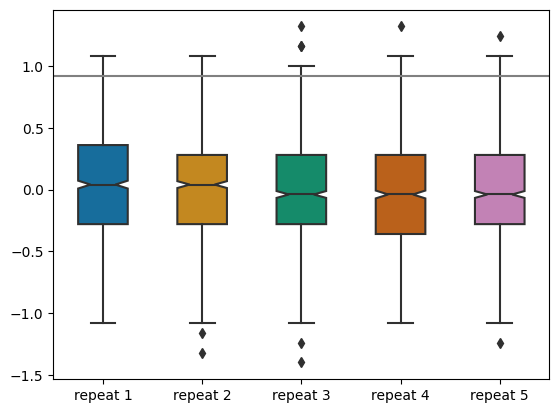

In [9]:
resamples["repeat 3"] = resample_experiment(data["Reduction"], data["Treatment"], 1000)
resamples["repeat 4"] = resample_experiment(data["Reduction"], data["Treatment"], 1000)
resamples["repeat 5"] = resample_experiment(data["Reduction"], data["Treatment"], 1000)

import seaborn as sns

df = pd.DataFrame(resamples)
ax = sns.boxplot(data=df, palette="colorblind", notch=True, width=0.5)
ax.axhline(0.92, color="grey")
plt.show()

 Calculate the probability of getting a difference of 0.92 or more

In [10]:
np.sum(np.sum(df.round(2) >= 0.92)) / (1000 * 5)

0.0136

## Increase the number of repeats to estimate the p-value

In [11]:
random.seed(123)
differences = resample_experiment(data["Reduction"], data["Treatment"], 20_000)
above_threshold = np.sum(differences.round(2) >= 0.92)
p_value = above_threshold / len(differences)
print(f"p-value: {p_value:.4f}")
print(f"Number of permuations greater or equal 0.92: {above_threshold}")

p-value: 0.0124
Number of permuations greater or equal 0.92: 248
